In [7]:
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Access the dataset in your Google Drive
dataset_path = '/content/drive/MyDrive/covid-19/dataset.xlsx'



In [10]:
#load data into notebook
missing_values = ["n.a.", "?", "NA", "n/a", "na", "--"] #define missing values
data = pd.read_excel(dataset_path, na_values=missing_values)
data.shape

(5644, 111)

In [11]:
data = data.drop_duplicates()
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#analysis the data
#names of columns
data.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [13]:
#number of postive and negative patients
covid_counts = data['SARS-Cov-2 exam result'].value_counts()
covid_counts

SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64

In [14]:
# filter for negative cases that got hospitalized
# filter for negative cases
# filter for hospitalised cases


negative_cases = data[data['SARS-Cov-2 exam result'] == 'negative']
negative_hospitalized_regular = data[(data['SARS-Cov-2 exam result'] == 'negative') & (data['Patient addmited to regular ward (1=yes, 0=no)'] == 1)]
negative_hospitalized_semi = data[(data['SARS-Cov-2 exam result'] == 'negative') & (data['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1)]
negative_hospitalized_intense = data[(data['SARS-Cov-2 exam result'] == 'negative') & (data['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1)]
# calculate percentage of negative patients that got hospitalized
total_negative_cases = len(negative_cases)
total_hospitalised_neg = round(len(negative_hospitalized_regular) + len(negative_hospitalized_semi) + len(negative_hospitalized_intense))
percent_hospitalised = round((len(negative_hospitalized_regular) + len(negative_hospitalized_semi) + len(negative_hospitalized_intense)) / total_negative_cases * 100)

print(f'{percent_hospitalised} percent of the patients who tested negative were hospitalised')

2 percent of the patients who tested negative were hospitalised


In [15]:
# filter for negative cases that got hospitalized
# filter for negative cases
positive_cases = data[data['SARS-Cov-2 exam result'] == 'positive']
positive_hospitalized_regular = data[(data['SARS-Cov-2 exam result'] == 'positive') & (data['Patient addmited to regular ward (1=yes, 0=no)'] == 1)]
positive_hospitalized_semi = data[(data['SARS-Cov-2 exam result'] == 'positive') & (data['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1)]
positive_hospitalized_intense = data[(data['SARS-Cov-2 exam result'] == 'positive') & (data['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1)]
# calculate percentage of negative patients that got hospitalized
total_positive_cases = len(positive_cases)
total_hospitalised_positive = round(len(positive_hospitalized_regular) + len(positive_hospitalized_semi) + len(positive_hospitalized_intense))

percent_hospitalised_positive = round((len(positive_hospitalized_regular) + len(positive_hospitalized_semi) + len(positive_hospitalized_intense)) / total_positive_cases * 100)

print(f'{percent_hospitalised_positive} percent of the patients who tested positive were hospitalised')

9 percent of the patients who tested positive were hospitalised


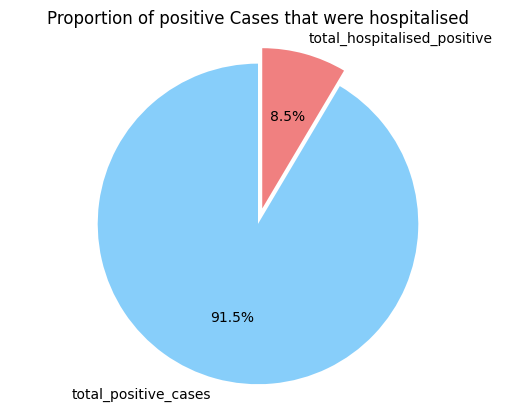

In [16]:
# create data for pie chart
labels = ['total_positive_cases', 'total_hospitalised_positive']
sizes = [total_positive_cases, total_hospitalised_positive]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)

# plot pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Proportion of positive Cases that were hospitalised')
plt.show()

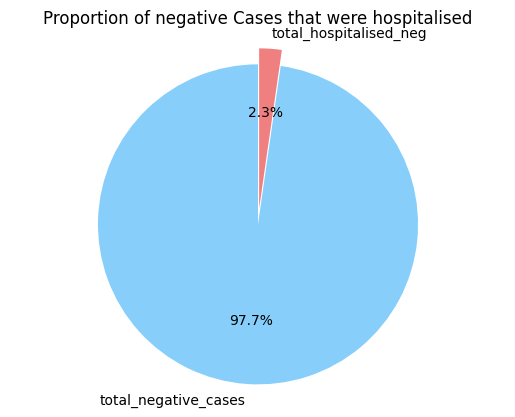

In [17]:
# create data for pie chart
labels = ['total_negative_cases', 'total_hospitalised_neg']
sizes = [total_negative_cases, total_hospitalised_neg]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)

# plot pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Proportion of negative Cases that were hospitalised')
plt.show()

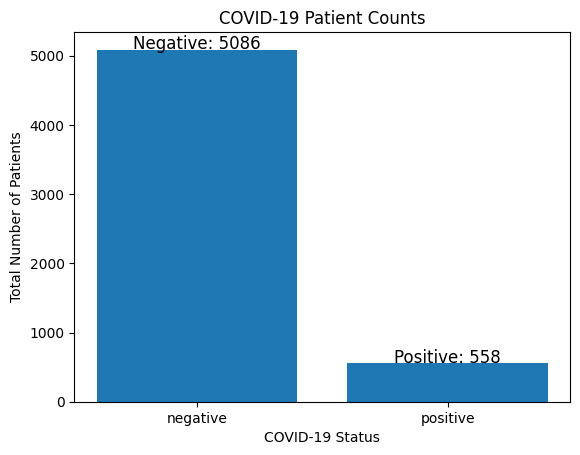

In [18]:
# Plot the counts as a bar chart
plt.bar(covid_counts.index, covid_counts.values)
# Get the total number of positive and negative patients
total_positive = covid_counts[1]
total_negative = covid_counts[0]
# Add labels and title to the plot
plt.xlabel('COVID-19 Status')
plt.ylabel('Total Number of Patients')
plt.title('COVID-19 Patient Counts')
# Add text with the total number of positive and negative patients
plt.text(0, covid_counts[0]+10, f"Negative: {total_negative}", ha='center', fontsize=12)
plt.text(1, covid_counts[1]+10, f"Positive: {total_positive}", ha='center', fontsize=12)

plt.show()

In [19]:
new_data = data[data['SARS-Cov-2 exam result'] == 'positive']
new_data.reset_index(drop=True)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,78511c183ae18bc,7,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,d7834ed75f2da44,16,positive,1,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b16b49f7bd3e692,10,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4382f5ea05e60c4,2,positive,0,0,0,0.991838,0.792188,-0.341548,1.469188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d3729cd2658ca64,15,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,5c386388ba3c3f0,16,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
554,9f8dfe2ae239238,4,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,db77903261ab6d0,15,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


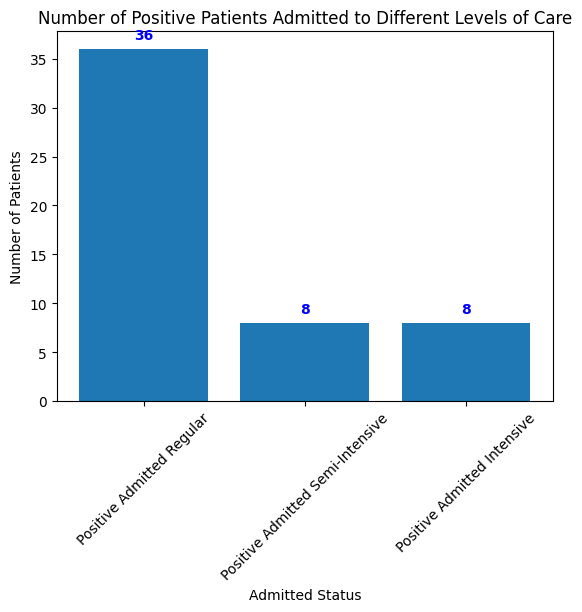

In [20]:
plt.bar(['Positive Admitted Regular', 'Positive Admitted Semi-Intensive','Positive Admitted Intensive'], [len(positive_hospitalized_regular), len(positive_hospitalized_semi), len(positive_hospitalized_intense)])
plt.title('Number of Positive Patients Admitted to Different Levels of Care')
plt.xlabel('Admitted Status')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
for i, v in enumerate([len(positive_hospitalized_regular), len(positive_hospitalized_semi), len(positive_hospitalized_intense)]):
    plt.text(i, v + 1, str(v), color='blue', fontweight='bold', ha='center')
plt.show()


<ipython-input-21-c90ea2480f37>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_reg[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
<ipython-input-21-c90ea2480f37>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_semi[column].dropna(), color='purple', ax=ax).set

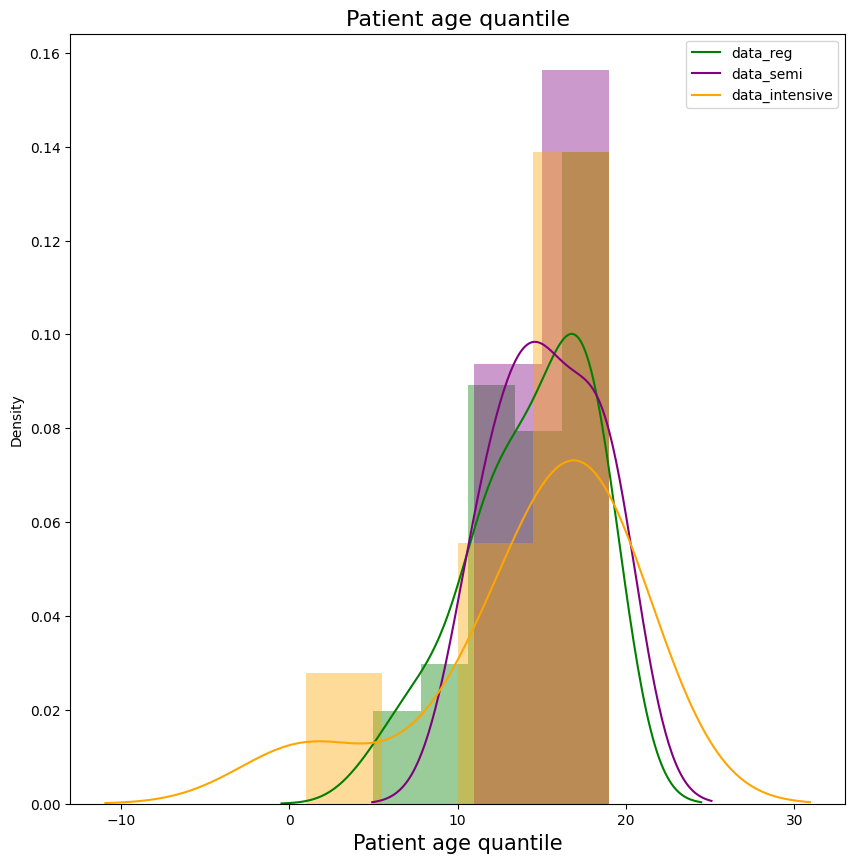

In [21]:
def plot_dist_col(column):
    data_reg = new_data[new_data['Patient addmited to regular ward (1=yes, 0=no)'] == 1]
    data_semi = new_data[new_data['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1]
    data_intensive = new_data[new_data['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1]

    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(data_reg[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(data_semi[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    sns.distplot(data_intensive[column].dropna(), color='orange', ax=ax).set_title(column, fontsize=16)

    plt.xlabel(column, fontsize=15)
    plt.legend(['data_reg', 'data_semi','data_intensive'])
    plt.show()

plot_dist_col('Patient age quantile')



In [22]:
# Create boolean DataFrame where True indicates a null value
null_df = new_data.isnull()

# Find columns where all values are null
all_null_cols = null_df.columns[null_df.all()]

# Print the column names
print(all_null_cols)

Index(['Mycoplasma pneumoniae', 'Fio2 (venous blood gas analysis)',
       'Urine - Nitrite', 'Urine - Sugar',
       'Partial thromboplastin time (PTT) ', 'Prothrombin time (PT), Activity',
       'Vitamin B12', 'D-Dimer', 'Albumin'],
      dtype='object')


In [23]:
new_data = new_data.drop(columns=all_null_cols)

In [24]:
new_data.shape

(558, 102)

In [25]:
new_data.isna().sum()

Patient ID                                                 0
Patient age quantile                                       0
SARS-Cov-2 exam result                                     0
Patient addmited to regular ward (1=yes, 0=no)             0
Patient addmited to semi-intensive unit (1=yes, 0=no)      0
                                                        ... 
HCO3 (arterial blood gas analysis)                       545
pO2 (arterial blood gas analysis)                        545
Arteiral Fio2                                            549
Phosphor                                                 557
ctO2 (arterial blood gas analysis)                       545
Length: 102, dtype: int64

In [26]:
new_data.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,558.000000,558.000000,558.000000,558.000000,83.000000,83.000000,83.000000,81.000000,83.000000,83.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,9.000000,1.000000,13.000000
mean,10.630824,0.064516,0.014337,0.014337,0.248097,0.262254,-0.705840,0.275231,0.303373,-0.038107,...,0.136139,-0.336207,0.135437,0.326704,-0.258837,-0.221931,0.324335,-0.343363,-0.532989,0.277553
std,4.920180,0.245891,0.118982,0.118982,0.797130,0.827838,0.647726,0.897249,0.960428,0.873055,...,1.084992,0.374433,0.686604,0.358232,0.774522,0.798182,1.197331,0.658195,NaN,0.937606
min,0.000000,0.000000,0.000000,0.000000,-1.777679,-1.651396,-2.062515,-1.896609,-1.661031,-1.694489,...,-1.999560,-0.765332,-1.327899,-0.224899,-1.519125,-1.546844,-1.054307,-1.532932,-0.532989,-1.153251
25%,6.000000,0.000000,0.000000,0.000000,-0.415809,-0.366948,-1.095256,-0.325903,-0.400461,-0.679533,...,-0.202809,-0.590135,-0.251104,0.028615,-0.872898,-0.848024,-0.799338,-0.011744,-0.532989,-0.639426
50%,11.000000,0.000000,0.000000,0.000000,0.350958,0.416252,-0.718402,0.235063,0.278308,-0.073970,...,0.481668,-0.359614,-0.091579,0.354563,-0.378725,-0.354739,0.247995,-0.011744,-0.532989,0.182693
75%,15.000000,0.000000,0.000000,0.000000,0.934617,0.886172,-0.335267,0.796029,0.930631,0.557179,...,0.695567,-0.147534,0.666165,0.644294,0.153461,0.220760,0.950140,-0.011744,-0.532989,0.902048
max,19.000000,1.000000,1.000000,1.000000,1.655607,1.919995,1.756275,2.703313,2.975753,2.152110,...,1.337265,0.525589,1.224503,0.849520,1.217834,1.289544,2.205371,-0.011744,-0.532989,1.826932


In [27]:
# Create dataframe counting NaN values per column
nan_df = pd.DataFrame(new_data.isna().sum()).reset_index()
nan_df.columns = ['Column', 'NaN_Count']
nan_df['NaN_Count'] = nan_df['NaN_Count'].astype('int')
nan_df['NaN_%'] = round(nan_df['NaN_Count'] / 558 * 100, 1)
nan_df['Type'] = 'Missingness'
nan_df.sort_values('NaN_%', inplace=True)

complete_dfs = []

for i in range(nan_df.shape[0]):
    complete_df = pd.DataFrame([[nan_df.loc[i, 'Column'], new_data.shape[0] - nan_df.loc[i, 'NaN_Count'],
                                 100 - nan_df.loc[i, 'NaN_%'], 'Completeness']],
                                columns=['Column', 'NaN_Count', 'NaN_%', 'Type'])
    complete_df['NaN_%'] = complete_df['NaN_%'].astype('int')
    complete_df['NaN_Count'] = complete_df['NaN_Count'].astype('int')
    complete_dfs.append(complete_df)

nan_df = pd.concat([nan_df] + complete_dfs, ignore_index=True)


In [28]:
# Missingness Plot
import plotly.express as px
fig = px.bar(nan_df,
             x='Column',
             y='NaN_%',
             title='Missingness Plot',
             color='Type',
             template='plotly_dark',
             opacity = 0.6,
             height = 800,
             color_discrete_sequence=['#dbdbdb','#38cae0']
            )
fig.show()

In [29]:
nan_df = pd.DataFrame(new_data.isna().sum()).reset_index()
nan_df.columns  = ['Column', 'NaN_Count']
nan_df['NaN_Count'] = nan_df['NaN_Count'].astype('int')
nan_df['NaN_%'] = round(nan_df['NaN_Count'] / len(new_data) * 100, 1)

columns_with_92_percent_missing = list(nan_df[nan_df['NaN_%'] > 92]['Column'])
columns_with_92_percent_missing

['Serum Glucose',
 'Alanine transaminase',
 'Aspartate transaminase',
 'Gamma-glutamyltransferase\xa0',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Indirect Bilirubin',
 'Alkaline phosphatase',
 'Ionized calcium\xa0',
 'Strepto A',
 'Magnesium',
 'pCO2 (venous blood gas analysis)',
 'Hb saturation (venous blood gas analysis)',
 'Base excess (venous blood gas analysis)',
 'pO2 (venous blood gas analysis)',
 'Total CO2 (venous blood gas analysis)',
 'pH (venous blood gas analysis)',
 'HCO3 (venous blood gas analysis)',
 'Rods #',
 'Segmented',
 'Promyelocytes',
 'Metamyelocytes',
 'Myelocytes',
 'Myeloblasts',
 'Urine - Esterase',
 'Urine - Aspect',
 'Urine - pH',
 'Urine - Hemoglobin',
 'Urine - Bile pigments',
 'Urine - Ketone Bodies',
 'Urine - Density',
 'Urine - Urobilinogen',
 'Urine - Protein',
 'Urine - Leukocytes',
 'Urine - Crystals',
 'Urine - Red blood cells',
 'Urine - Hyaline cylinders',
 'Urine - Granular cylinders',
 'Urine - Yeasts',
 'Urine - Color',
 'Relationship (Pati

In [30]:
new_data = new_data.drop(columns_with_92_percent_missing, axis=1)

In [31]:
new_data.reset_index(drop=True)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test"
0,78511c183ae18bc,7,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,d7834ed75f2da44,16,positive,1,0,0,NaN,NaN,NaN,NaN,...,not_detected,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b16b49f7bd3e692,10,positive,0,0,0,NaN,NaN,NaN,NaN,...,not_detected,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4382f5ea05e60c4,2,positive,0,0,0,0.991838,0.792188,-0.341548,1.469188,...,not_detected,not_detected,-0.414215,-0.513909,NaN,-0.322340,-0.058626,0.143752,NaN,NaN
4,d3729cd2658ca64,15,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,5c386388ba3c3f0,16,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
554,9f8dfe2ae239238,4,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,db77903261ab6d0,15,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#removing patient id and SARS-Cov-2 exam result
remove_col = ['Patient ID','SARS-Cov-2 exam result']
new_data = new_data.drop(remove_col,axis = 1)


In [33]:
new_data.reset_index(drop=True)

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test"
0,7,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,...,not_detected,not_detected,-0.414215,-0.513909,NaN,-0.322340,-0.058626,0.143752,NaN,NaN
4,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,16,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
554,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
def multiclass_target(row):
    check = 0

    check += 3 if (row['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1) else 0
    check += 2 if (row['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1) else 0
    check += 1 if (row['Patient addmited to regular ward (1=yes, 0=no)'] == 1) else 0
    row['target'] = check
    return row

new_data = new_data.apply(multiclass_target, axis=1)
new_data

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",target
67,7,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
284,16,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
513,10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
568,2,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,...,not_detected,-0.414215,-0.513909,NaN,-0.322340,-0.058626,0.143752,NaN,NaN,0
676,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,16,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5633,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5634,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5639,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [35]:
new_data["target"].unique()

array([0, 1, 3, 2])

In [36]:
X = new_data.drop(columns=['Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)','target'])
y=new_data['target']


In [37]:
cat_cols_train = list(X.select_dtypes(include=['object']).columns)
cat_cols_train

['Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Influenza B, rapid test',
 'Influenza A, rapid test']

In [38]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
cat_cols_train = X.select_dtypes(include=['object']).columns.tolist()
# Impute the missing values in the categorical columns with 'missing'
X[cat_cols_train] = imputer.fit_transform(X[cat_cols_train])

In [39]:

X

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,MCHC,Leukocytes,Basophils,...,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test"
67,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,missing,missing,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
284,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
513,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
568,2,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,-0.452899,-0.420197,1.303529,...,not_detected,not_detected,-0.414215,-0.513909,NaN,-0.322340,-0.058626,0.143752,missing,missing
676,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,missing,missing,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,missing,missing,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
5633,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,missing,missing,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
5634,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,missing,missing,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
5639,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,missing,missing,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing


In [40]:
from sklearn.preprocessing import LabelEncoder

for max_idx in X.columns:
    if X[max_idx].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(X[max_idx].values))
        X[max_idx] = lbl.transform(list(X[max_idx].values))

In [41]:
X

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,MCHC,Leukocytes,Basophils,...,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test"
67,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
284,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
513,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
568,2,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,-0.452899,-0.420197,1.303529,...,1,1,-0.414215,-0.513909,NaN,-0.322340,-0.058626,0.143752,0,0
676,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5633,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5634,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5639,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [42]:
# compute the median value of each column
mean_values = X.mean()

# fill missing values with median value of each column
X.fillna(mean_values, inplace=True)

In [43]:
X.head()

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,MCHC,Leukocytes,Basophils,...,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test"
67,7,0.248097,0.262254,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.721443,-0.157522,...,0,0,-0.091775,-0.165712,0.179621,0.197354,-0.203514,-0.215628,0,0
284,16,0.248097,0.262254,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.721443,-0.157522,...,1,1,-0.091775,-0.165712,0.179621,0.197354,-0.203514,-0.215628,0,0
513,10,0.248097,0.262254,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.721443,-0.157522,...,1,1,-0.091775,-0.165712,0.179621,0.197354,-0.203514,-0.215628,0,0
568,2,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,-0.452899,-0.420197,1.303529,...,1,1,-0.414215,-0.513909,0.179621,-0.322340,-0.058626,0.143752,0,0
676,15,0.248097,0.262254,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.721443,-0.157522,...,0,0,-0.091775,-0.165712,0.179621,0.197354,-0.203514,-0.215628,0,0


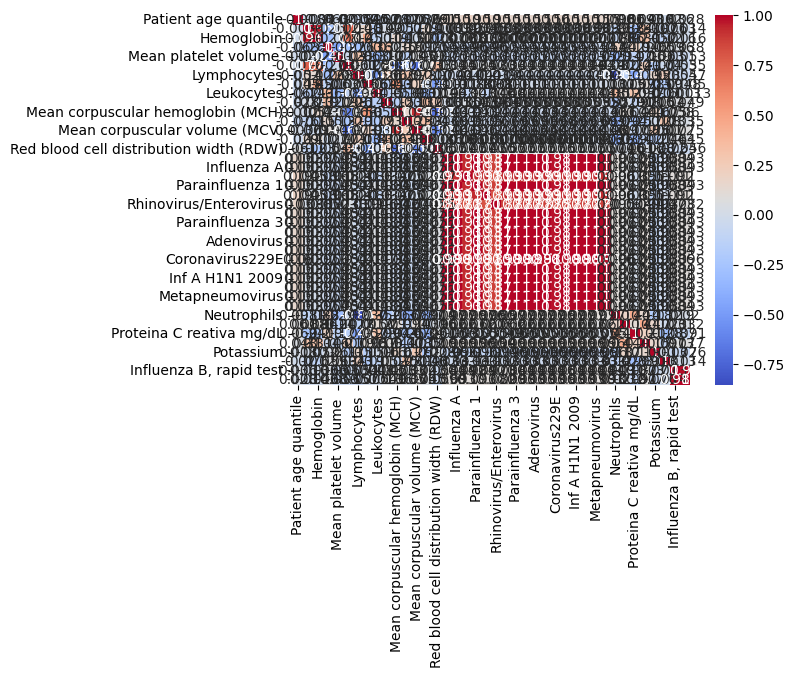

In [44]:
# create a correlation matrix
corr_matrix = X.corr()

# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

In [45]:
# Find highly correlated columns
high_corr = np.where(np.abs(corr_matrix) > 0.79)

# Loop through the highly correlated pairs and delete one of them
for i in range(len(high_corr[0])):
    col1 = high_corr[0][i]
    col2 = high_corr[1][i]
    if col1 < X.shape[1] and col2 < X.shape[1]:
        if col1 != col2:
            if X.columns[col1] < X.columns[col2]:
                X.drop(X.columns[col1], axis=1, inplace=True)
            else:
                X.drop(X.columns[col2], axis=1, inplace=True)

In [46]:
X


,Patient age quantile,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,MCHC,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza B,Parainfluenza 1,CoronavirusNL63,Urea,Proteina C reativa mg/dL,"Influenza B, rapid test"
67,7,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.157522,-0.071217,-0.481638,-0.138112,-0.099663,0,1,0,1,-0.165712,0.179621,0
284,16,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.157522,-0.071217,-0.481638,-0.138112,-0.099663,1,2,1,2,-0.165712,0.179621,0
513,10,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.157522,-0.071217,-0.481638,-0.138112,-0.099663,1,2,1,2,-0.165712,0.179621,0
568,2,-0.341548,1.469188,1.653476,-0.048383,-0.452899,1.303529,-1.442245,-0.498393,-1.396114,0.967144,1,2,1,2,-0.513909,0.179621,0
676,15,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.157522,-0.071217,-0.481638,-0.138112,-0.099663,0,1,0,1,-0.165712,0.179621,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,16,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.157522,-0.071217,-0.481638,-0.138112,-0.099663,0,1,0,1,-0.165712,0.179621,0
5633,4,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.157522,-0.071217,-0.481638,-0.138112,-0.099663,0,1,0,1,-0.165712,0.179621,0
5634,15,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.157522,-0.071217,-0.481638,-0.138112,-0.099663,0,1,0,1,-0.165712,0.179621,0
5639,3,-0.705840,0.275231,0.303373,-0.038107,0.114577,-0.157522,-0.071217,-0.481638,-0.138112,-0.099663,0,1,0,1,-0.165712,0.179621,0


In [47]:
y

67      0
284     1
513     0
568     0
676     0
       ..
5632    0
5633    0
5634    0
5639    0
5643    0
Name: target, Length: 558, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [49]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42)


In [50]:
X_train.reset_index(drop=True)

,Patient age quantile,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,MCHC,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza B,Parainfluenza 1,CoronavirusNL63,Urea,Proteina C reativa mg/dL,"Influenza B, rapid test"
0,19,-1.358180,0.725802,-0.736034,0.053500,-0.714386,-0.300705,0.485811,-0.756378,0.917978,-0.228016,1,2,1,2,0.184394,-0.144216,0
1,19,-0.906829,-0.325903,0.578024,-0.295726,-0.353319,-1.140144,-0.135455,-0.835508,0.025985,-0.182790,0,1,0,1,0.453725,-0.503570,0
2,12,-0.736640,0.174342,1.282100,0.441194,-0.462885,0.317081,-1.166456,-0.530865,-1.076356,0.865687,1,2,1,2,0.231755,-0.216349,0
3,18,-0.690548,0.844205,-0.200846,-0.721841,-0.081030,-0.529226,0.577152,-0.510537,0.671853,-0.648562,0,1,0,1,-0.434848,0.809194,0
4,16,-0.170365,0.285143,-0.864303,0.256066,0.115764,-0.332315,0.458108,-0.125074,0.439488,-0.473748,0,1,0,1,-0.975267,0.085905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,15,-0.617240,0.739186,-0.374953,0.529765,0.020428,-0.261441,0.458874,-0.724682,0.481192,-0.558437,1,2,1,2,-0.672946,-0.191007,0
1412,17,0.434751,-0.322101,-1.503643,-0.436382,0.223558,-0.497644,0.486400,0.764432,0.428647,-0.377994,0,1,0,1,-1.337849,0.720429,0
1413,19,-1.099098,0.742223,-0.448672,-0.318267,-0.890836,-0.211293,-0.124782,-0.795089,0.332154,0.266716,1,2,1,2,-0.177439,0.891441,0
1414,16,-0.253578,-0.492491,-0.959053,-0.221306,0.871764,-0.381131,0.441119,0.341868,0.057564,-0.702791,0,1,0,1,-0.974063,1.018894,0


In [51]:
y_train.reset_index(drop=True)

0       1
1       0
2       1
3       2
4       2
       ..
1411    2
1412    2
1413    1
1414    2
1415    2
Name: target, Length: 1416, dtype: int64

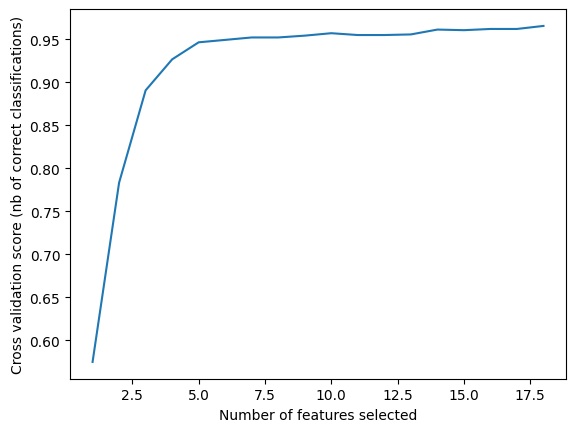

In [52]:
# perform feature selection using RFECV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier


# Create an instance of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier instance to the training data
rfc.fit(X_train, y_train)

# Create an instance of RFECV and fit it to the training data
selector = RFECV(rfc, step=1, cv=10)
selector = selector.fit(X_train, y_train)



plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1), selector.cv_results_['mean_test_score'])
plt.show()

In [53]:
# get the index of the maximum score
idx = np.argmax(selector.cv_results_['mean_test_score'])

# get the number of selected features
num_features = idx + 1

print(f"Number of selected features: {num_features}")

Number of selected features: 18


In [54]:
# get the boolean mask of the selected features
feature_mask = selector.support_

# get the names of the selected features
selected_features = X_train.columns[selector.get_support()]

print(f"Selected features: {selected_features}")

Selected features: Index(['Patient age quantile', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes', 'MCHC', 'Basophils',
       'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza B', 'Parainfluenza 1',
       'CoronavirusNL63', 'Urea', 'Proteina C reativa mg/dL',
       'Influenza B, rapid test'],
      dtype='object')


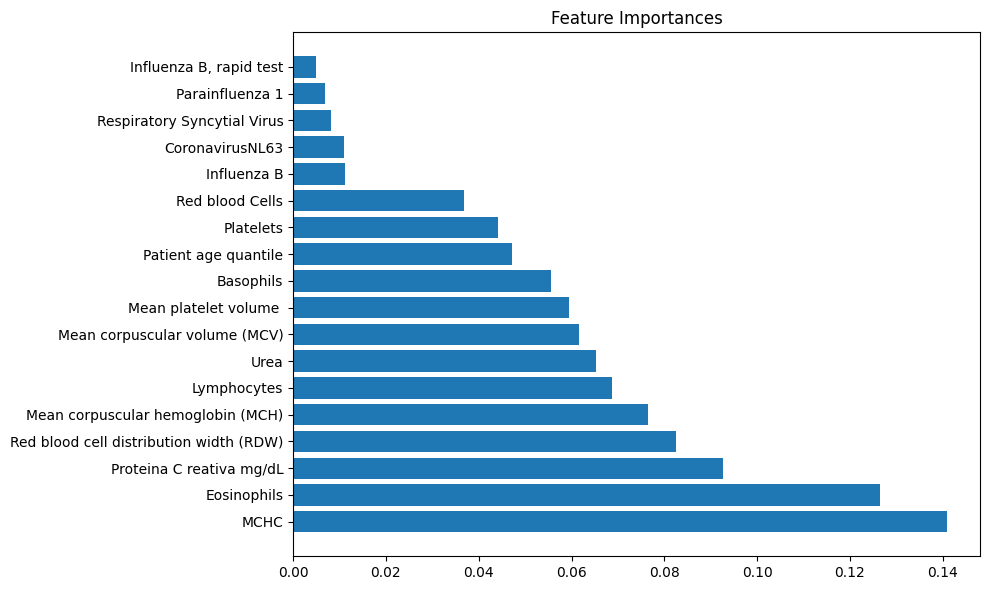

In [55]:

# Use the feature_mask to select the important features
importances = rfc.feature_importances_[feature_mask]



# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
features_sorted = selected_features[sorted_idx]
importances_sorted = importances[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(importances_sorted)), importances_sorted, align='center')
plt.yticks(range(len(importances_sorted)), features_sorted)
plt.tight_layout()
plt.show()



In [56]:
!pip install shap
import shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.6 MB/s eta 0:00:00


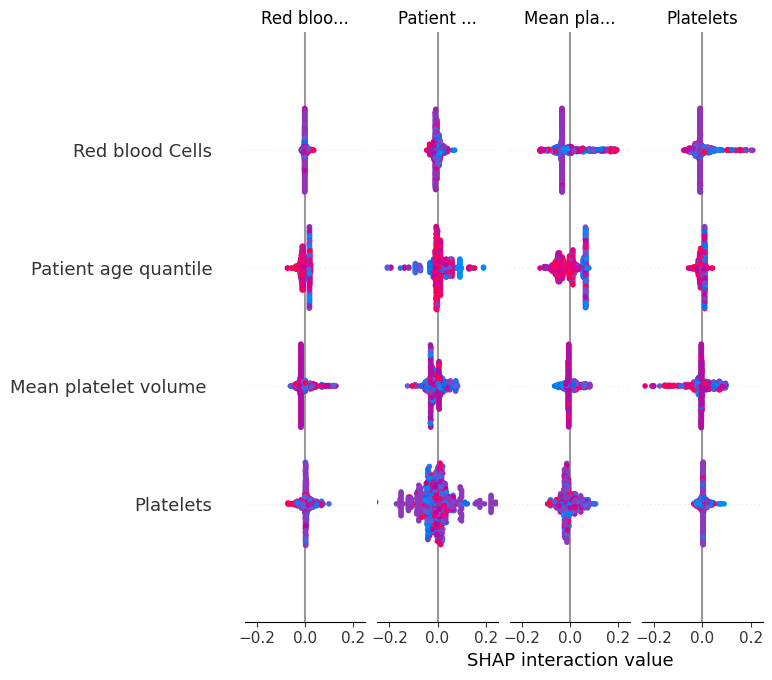

In [57]:
# Train a new model using the selected features
clf_selected = RandomForestClassifier(n_estimators=100)
clf_selected.fit(X_train[selected_features], y_train)

# Calculate SHAP values for the test data
explainer = shap.TreeExplainer(clf_selected)
shap_values = explainer.shap_values(X_test[selected_features])

# Plot SHAP values
shap.summary_plot(shap_values,X_test[selected_features], plot_type="bar")


In [58]:
X_train_select = X_train[selected_features]
X_train_select.reset_index(drop=True)

,Patient age quantile,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,MCHC,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza B,Parainfluenza 1,CoronavirusNL63,Urea,Proteina C reativa mg/dL,"Influenza B, rapid test"
0,19,-1.358180,0.725802,-0.736034,0.053500,-0.714386,-0.300705,0.485811,-0.756378,0.917978,-0.228016,1,2,1,2,0.184394,-0.144216,0
1,19,-0.906829,-0.325903,0.578024,-0.295726,-0.353319,-1.140144,-0.135455,-0.835508,0.025985,-0.182790,0,1,0,1,0.453725,-0.503570,0
2,12,-0.736640,0.174342,1.282100,0.441194,-0.462885,0.317081,-1.166456,-0.530865,-1.076356,0.865687,1,2,1,2,0.231755,-0.216349,0
3,18,-0.690548,0.844205,-0.200846,-0.721841,-0.081030,-0.529226,0.577152,-0.510537,0.671853,-0.648562,0,1,0,1,-0.434848,0.809194,0
4,16,-0.170365,0.285143,-0.864303,0.256066,0.115764,-0.332315,0.458108,-0.125074,0.439488,-0.473748,0,1,0,1,-0.975267,0.085905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,15,-0.617240,0.739186,-0.374953,0.529765,0.020428,-0.261441,0.458874,-0.724682,0.481192,-0.558437,1,2,1,2,-0.672946,-0.191007,0
1412,17,0.434751,-0.322101,-1.503643,-0.436382,0.223558,-0.497644,0.486400,0.764432,0.428647,-0.377994,0,1,0,1,-1.337849,0.720429,0
1413,19,-1.099098,0.742223,-0.448672,-0.318267,-0.890836,-0.211293,-0.124782,-0.795089,0.332154,0.266716,1,2,1,2,-0.177439,0.891441,0
1414,16,-0.253578,-0.492491,-0.959053,-0.221306,0.871764,-0.381131,0.441119,0.341868,0.057564,-0.702791,0,1,0,1,-0.974063,1.018894,0


In [59]:
from sklearn.preprocessing import StandardScaler

# Create an instance of MinMaxScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_select)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test[selected_features])

In [60]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [61]:
acc_lst = []
def model_assess(model, name='Default'):
    model.fit(X_train_scaled, y_train)
    prds = model.predict(X_test_scaled)
    model_acc = accuracy_score(y_test, prds)
    acc_lst.append(100*model_acc)
    print('---', name, '---', '\n',
          confusion_matrix(y_test, prds), '\n',
          'Accuracy:', (accuracy_score(y_test, prds)), '\n',
          'Classification Report:', (classification_report(y_test, prds)))

In [62]:
# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, 'Random Forest')


# XGBOOST
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, 'XGBoost')


--- Random Forest --- 
 [[148  11   0   3]
 [ 16 126   1   0]
 [  0   0 151   0]
 [  0   0   0 152]] 
 Accuracy: 0.9490131578947368 
 Classification Report:               precision    recall  f1-score   support

           0       0.90      0.91      0.91       162
           1       0.92      0.88      0.90       143
           2       0.99      1.00      1.00       151
           3       0.98      1.00      0.99       152

    accuracy                           0.95       608
   macro avg       0.95      0.95      0.95       608
weighted avg       0.95      0.95      0.95       608

--- XGBoost --- 
 [[149   9   2   2]
 [ 16 127   0   0]
 [  0   0 151   0]
 [  0   0   0 152]] 
 Accuracy: 0.9523026315789473 
 Classification Report:               precision    recall  f1-score   support

           0       0.90      0.92      0.91       162
           1       0.93      0.89      0.91       143
           2       0.99      1.00      0.99       151
           3       0.99      1.00      0

<ipython-input-63-f42b954fadd7>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




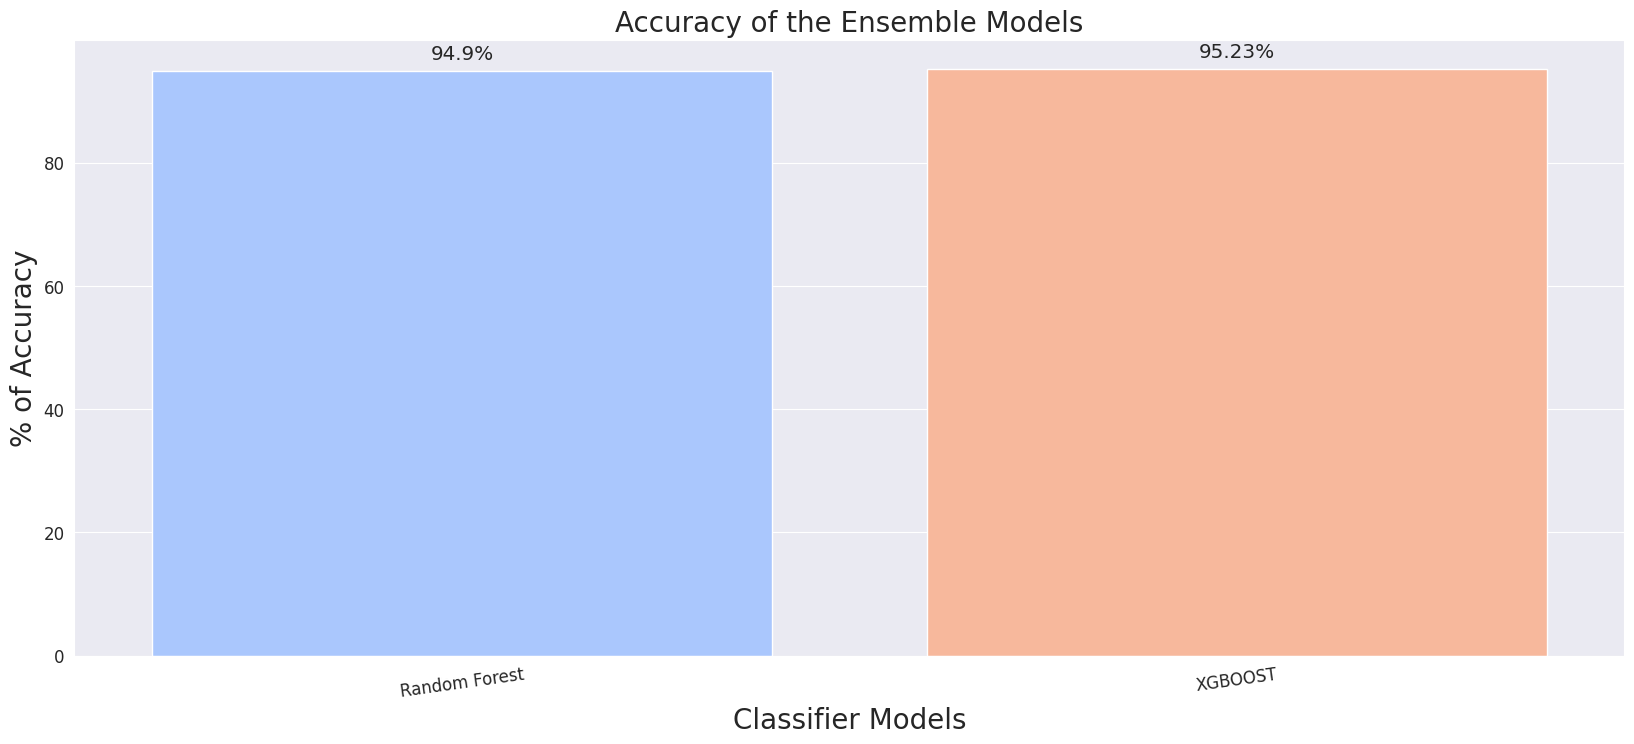

In [63]:
model_list = ['Random Forest', 'XGBOOST']

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y = acc_lst, palette = "coolwarm", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of the Ensemble Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()


Testing with only five features to compare models performance

In [81]:
X_train.columns

Index(['Patient age quantile', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes', 'MCHC', 'Basophils',
       'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza B', 'Parainfluenza 1',
       'CoronavirusNL63', 'Urea', 'Proteina C reativa mg/dL',
       'Influenza B, rapid test'],
      dtype='object')

In [82]:
new_X_train_select = X_train[['Proteina C reativa mg/dL', 'Eosinophils','MCHC','Red blood cell distribution width (RDW)','Mean corpuscular hemoglobin (MCH)']]

new_X_test_select = X_test[['Proteina C reativa mg/dL', 'Eosinophils','MCHC','Red blood cell distribution width (RDW)','Mean corpuscular hemoglobin (MCH)']]


In [83]:
new_X_train_select

,Proteina C reativa mg/dL,Eosinophils,MCHC,Red blood cell distribution width (RDW),Mean corpuscular hemoglobin (MCH)
575,-0.144216,-0.756378,-0.714386,-0.228016,0.485811
557,-0.503570,-0.835508,-0.353319,-0.182790,-0.135455
706,-0.216349,-0.530865,-0.462885,0.865687,-1.166456
1169,0.809194,-0.510537,-0.081030,-0.648562,0.577152
1362,0.085905,-0.125074,0.115764,-0.473748,0.458108
...,...,...,...,...,...
1130,-0.191007,-0.724682,0.020428,-0.558437,0.458874
1294,0.720429,0.764432,0.223558,-0.377994,0.486400
860,0.891441,-0.795089,-0.890836,0.266716,-0.124782
1459,1.018894,0.341868,0.871764,-0.702791,0.441119


In [84]:
from sklearn.preprocessing import StandardScaler

# Create an instance of MinMaxScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled_new = scaler.fit_transform(new_X_train_select)

# Transform the test data using the fitted scaler
X_test_scaled_new = scaler.transform(new_X_test_select)

In [85]:
acc_lst = []
def model_assess(model, name='Default'):
    model.fit(X_train_scaled_new, y_train)
    prds = model.predict(X_test_scaled_new)
    model_acc = accuracy_score(y_test, prds)
    acc_lst.append(100*model_acc)
    print('---', name, '---', '\n',
          confusion_matrix(y_test, prds), '\n',
          'Accuracy:', (accuracy_score(y_test, prds)), '\n',
          'Classification Report:', (classification_report(y_test, prds)))

In [86]:
# Random Forest
rforest_new = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest_new, 'Random Forest')


# XGBOOST
xgb_new = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb_new, 'XGBoost')


--- Random Forest --- 
 [[149   6   4   3]
 [ 21 118   4   0]
 [  0   0 151   0]
 [  0   3   0 149]] 
 Accuracy: 0.9325657894736842 
 Classification Report:               precision    recall  f1-score   support

           0       0.88      0.92      0.90       162
           1       0.93      0.83      0.87       143
           2       0.95      1.00      0.97       151
           3       0.98      0.98      0.98       152

    accuracy                           0.93       608
   macro avg       0.93      0.93      0.93       608
weighted avg       0.93      0.93      0.93       608

--- XGBoost --- 
 [[153   4   4   1]
 [ 20 120   3   0]
 [  0   0 151   0]
 [  0   3   0 149]] 
 Accuracy: 0.9424342105263158 
 Classification Report:               precision    recall  f1-score   support

           0       0.88      0.94      0.91       162
           1       0.94      0.84      0.89       143
           2       0.96      1.00      0.98       151
           3       0.99      0.98      0

<ipython-input-87-f42b954fadd7>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




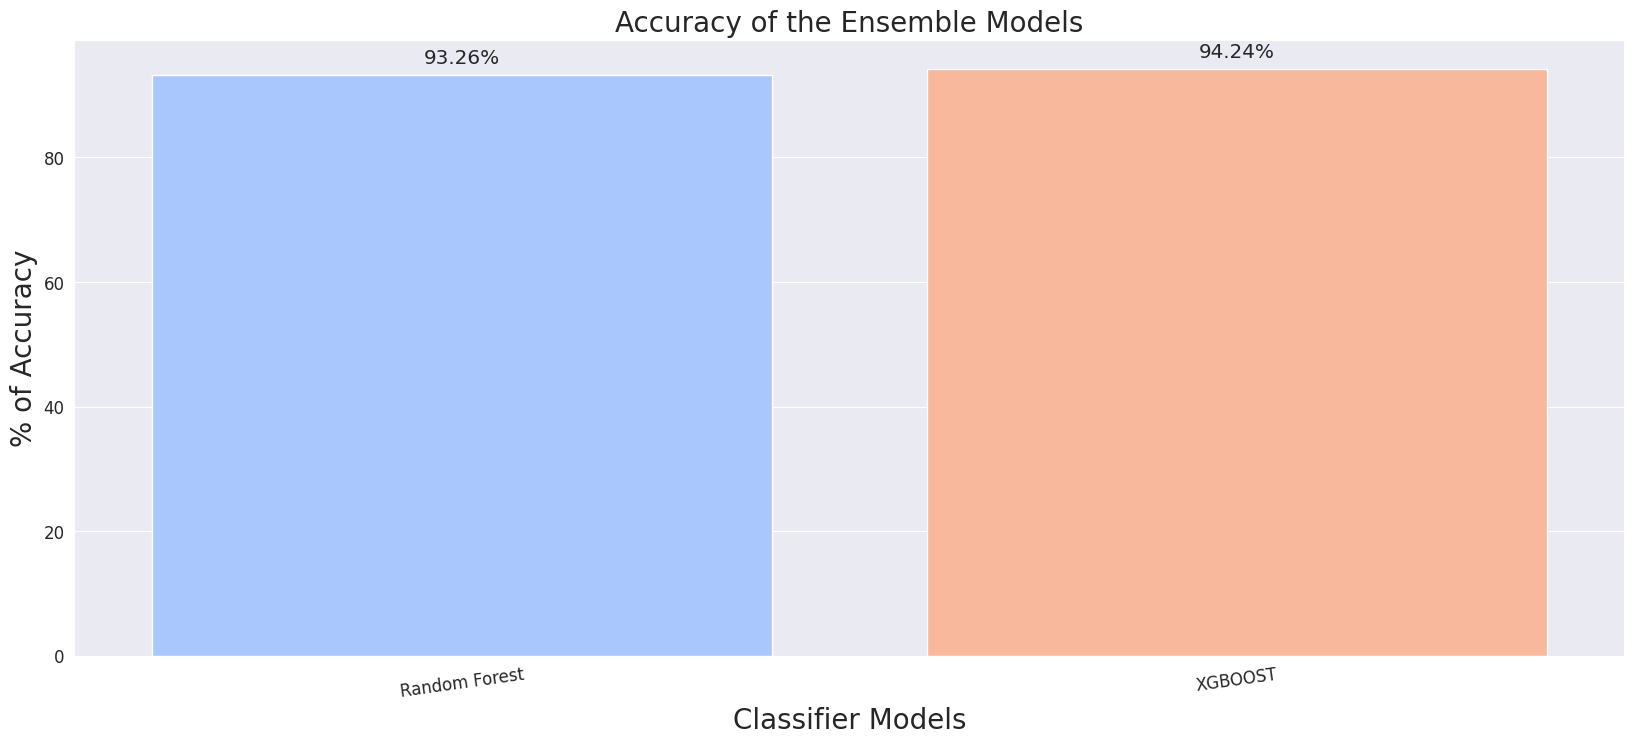

In [87]:
model_list = ['Random Forest', 'XGBOOST']

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y = acc_lst, palette = "coolwarm", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of the Ensemble Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [88]:
import pickle

# Save the trained model to a file
with open('xgboost.pkl', 'wb') as f:
    pickle.dump(xgb_new, f)

In [89]:
#testing the model


#Load the saved model
with open('xgboost.pkl', 'rb') as f:
    xgb = pickle.load(f)

# Define the features for prediction
features = {
    'MCHC': 33,
    'Mean corpuscular hemoglobin (MCH)': 27,
    'Eosinophils': 0.05,
    'Red blood cell distribution width (RDW)': 13,
    'Proteina C reativa mg/dL': 5,
}

# Convert features to a numpy array
X = np.array([list(features.values())])

# Make predictions
predictions = xgb.predict(X)

# Print predictions
print("Predictions:", predictions)


Predictions: [2]
